Using the cleaned 2018 and 2021 data, we will analyze the medical confidence in the United States pre and post pandemic.

##### Preliminary Data Analysis Preparation

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("../data/2018_v_2021_data.csv")
print("Shape of data:", df.shape, "\n")
print("Number of 2018 Entries:\n", df[df['year']==2018].count(), "\n")
print("Number of 2021 Entries:\n", df[df['year']==2021].count(), "\n")

Shape of data: (4272, 9) 

Number of 2018 Entries:
 conmedic    1412
partyid     2104
region      2136
id          2136
age         2132
sex         2136
race        2136
degree      2136
year        2136
dtype: int64 

Number of 2021 Entries:
 conmedic    1404
partyid     2115
region      2136
id          2136
age         1955
sex         2085
race        2113
degree      2122
year        2136
dtype: int64 



In [8]:
df.head(10)

,conmedic,partyid,region,id,age,sex,race,degree,year
0,NaN,5.0,1,1,43.0,1.0,1.0,2.0,2018
1,1.0,2.0,1,2,74.0,2.0,1.0,1.0,2018
2,1.0,4.0,1,3,42.0,1.0,1.0,3.0,2018
3,3.0,2.0,1,4,63.0,2.0,1.0,3.0,2018
4,NaN,2.0,1,6,67.0,2.0,1.0,3.0,2018
5,1.0,0.0,2,7,59.0,2.0,2.0,1.0,2018
6,2.0,5.0,2,8,43.0,1.0,1.0,1.0,2018
7,2.0,3.0,2,9,62.0,2.0,1.0,0.0,2018
8,2.0,1.0,1,10,55.0,1.0,1.0,1.0,2018
9,2.0,1.0,1,12,34.0,2.0,3.0,1.0,2018


Since we are looking at "conmedic", let us filter our dataset to only keep the data entries with conmedic values before conducting further data analysis/visualization.

In [11]:
df = df[df['conmedic'].notnull()]
print("Shape of data:", df.shape, "\n")
print("Number of 2018 Entries:\n", df[df['year']==2018].count(), "\n")
print("Number of 2021 Entries:\n", df[df['year']==2021].count(), "\n")

Shape of data: (2816, 9) 

Number of 2018 Entries:
 conmedic    1412
partyid     1394
region      1412
id          1412
age         1409
sex         1412
race        1412
degree      1412
year        1412
dtype: int64 

Number of 2021 Entries:
 conmedic    1404
partyid     1391
region      1404
id          1404
age         1280
sex         1369
race        1392
degree      1395
year        1404
dtype: int64 



##### Quantiable Data Analysis

Here, let us evaluate the data with statistical measurements for the different attributes that we examine.

In [12]:
df.describe()

,conmedic,partyid,region,id,age,sex,race,degree,year
count,2816.000000,2785.000000,2816.000000,2816.000000,2689.000000,2781.000000,2804.000000,2807.000000,2816.000000
mean,1.744673,2.872172,5.010298,1166.461648,50.224247,1.553398,1.349144,1.884931,2019.495739
std,0.653293,2.096153,2.363029,675.775765,17.516635,0.497230,0.660054,1.263816,1.500260
min,1.000000,0.000000,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,2018.000000
25%,1.000000,1.000000,3.000000,584.000000,35.000000,1.000000,1.000000,1.000000,2018.000000
50%,2.000000,3.000000,5.000000,1159.500000,50.000000,2.000000,1.000000,1.000000,2018.000000
75%,2.000000,5.000000,7.000000,1744.250000,64.000000,2.000000,1.000000,3.000000,2021.000000
max,3.000000,7.000000,9.000000,2348.000000,89.000000,2.000000,3.000000,4.000000,2021.000000


In [116]:
df_year_grouping = df.groupby('year').describe()
pd.set_option('display.max_rows', 100)
df_year_grouping[['conmedic', 'partyid', 'age']].transpose()

year                   2018         2021
conmedic count  1412.000000  1404.000000
         mean      1.781161     1.707977
         std       0.664680     0.639778
         min       1.000000     1.000000
         25%       1.000000     1.000000
         50%       2.000000     2.000000
         75%       2.000000     2.000000
         max       3.000000     3.000000
partyid  count  1394.000000  1391.000000
         mean      2.898135     2.846154
         std       2.086695     2.106017
         min       0.000000     0.000000
         25%       1.000000     1.000000
         50%       3.000000     3.000000
         75%       5.000000     5.000000
         max       7.000000     7.000000
age      count  1409.000000  1280.000000
         mean     48.507452    52.114063
         std      17.928087    16.858129
         min      18.000000    18.000000
         25%      34.000000    38.000000
         50%      48.000000    53.000000
         75%      63.000000    65.000000
         max      89.000000    89.000000

**INSERT EXPLANATION HERE**

We show here how the number of subjects in each subgroup collected has changed pre and post pandemic.

In [139]:
var = 'partyid'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
partyid year          
0.0     2018       228
        2021       266
1.0     2018       206
        2021       175
2.0     2018       194
        2021       169
3.0     2018       240
        2021       297
4.0     2018       161
        2021       125
5.0     2018       160
        2021       136
6.0     2018       153
        2021       186
7.0     2018        52
        2021        37

In [141]:
var = 'sex'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
sex year          
1.0 2018       642
    2021       600
2.0 2018       770
    2021       769

In [142]:
var = 'race'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
race year          
1.0  2018      1012
     2021      1105
2.0  2018       236
     2021       159
3.0  2018       164
     2021       128

In [143]:
var = 'region'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
region year          
1      2018        68
       2021        90
2      2018       147
       2021       158
3      2018       228
       2021       263
4      2018        73
       2021       105
5      2018       305
       2021       321
6      2018       104
       2021        94
7      2018       174
       2021       156
8      2018       109
       2021       133
9      2018       204
       2021        84

In [144]:
var = 'degree'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
degree year          
0.0    2018       157
       2021        82
1.0    2018       699
       2021       586
2.0    2018       128
       2021       134
3.0    2018       273
       2021       329
4.0    2018       155
       2021       264

##### Data Visualization

Let us examine how the confidence in medicine has changed across our observed demographic groups pre and post pandemic.

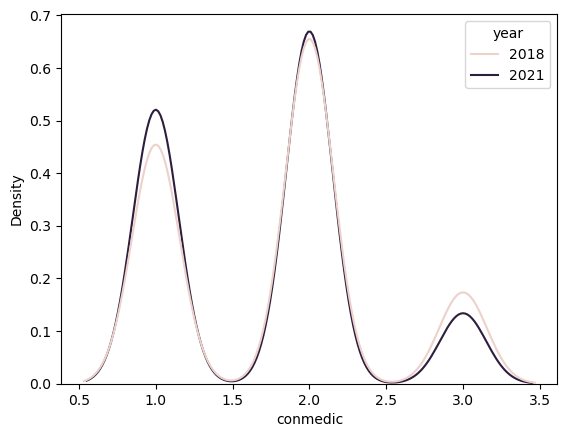

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.kdeplot(data=df, x='conmedic', hue='year', hue_order = [2018, 2021])

Visualizing kernel density of conmedic w.r.t year and party id

TODO: Use codebook to map party id to actual label

In [40]:
print(df.partyid.dropna().unique())

[2. 4. 0. 5. 3. 1. 6. 7.]


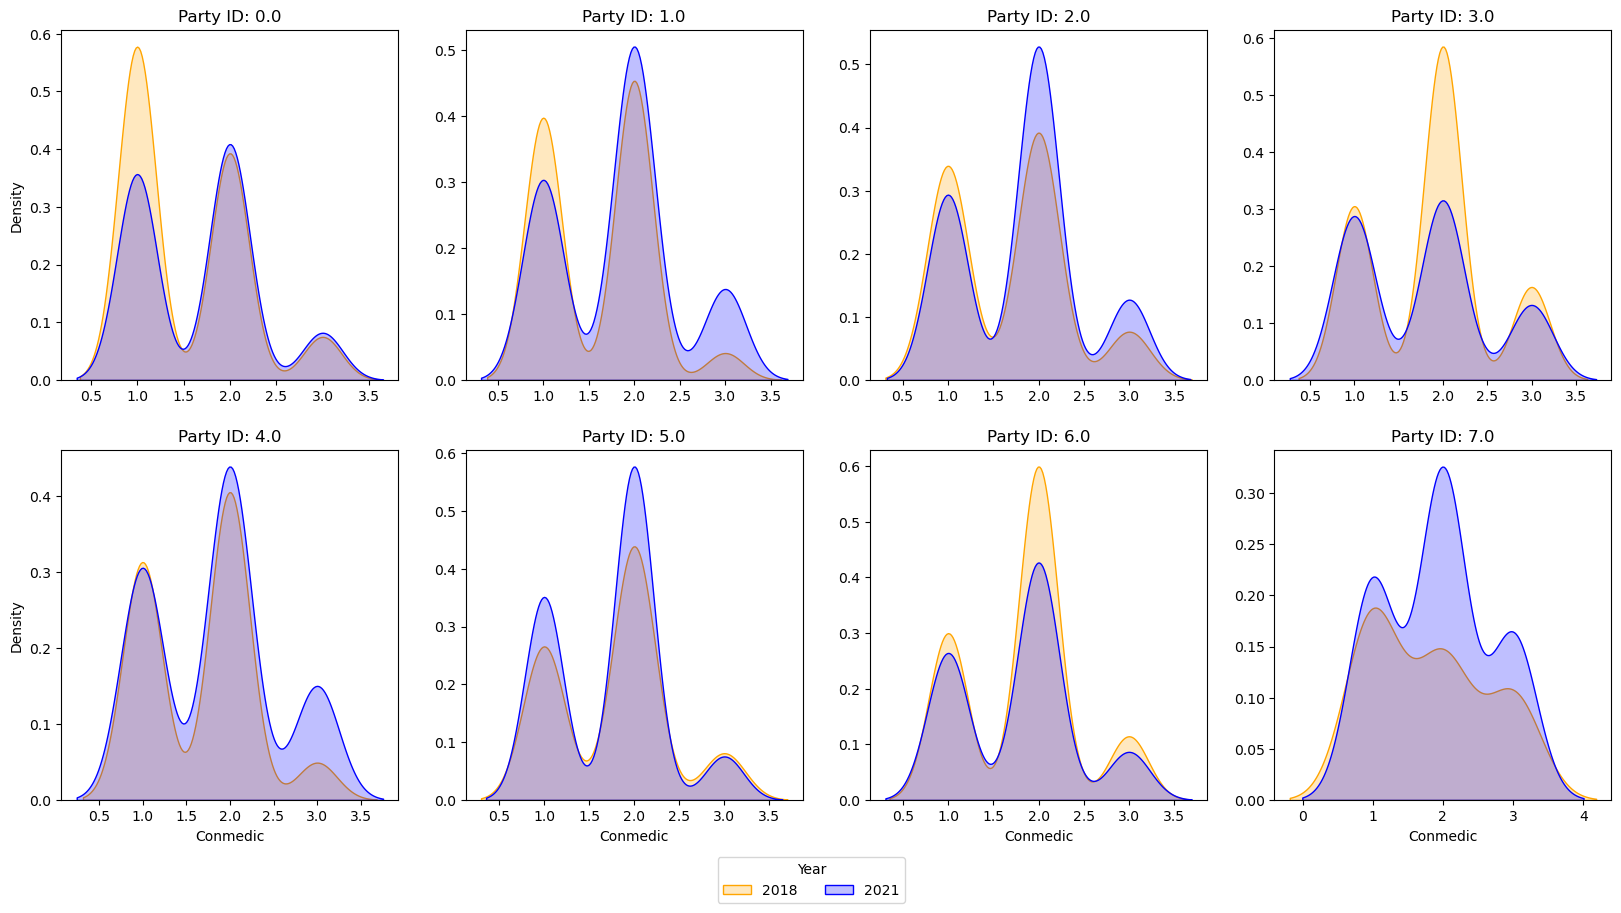

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

parties = sorted(df.partyid.dropna().unique())
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

for i, party in enumerate(parties):
    row = i//4
    col = i%4
    
    plot = sns.kdeplot(data=df[df['partyid']==party], x='conmedic', hue='year', hue_order = [2018, 2021], palette=['blue', 'orange'], ax = axs[row][col], fill = True, legend=False)
    
    axs[row][col].set_xlabel("")
    axs[row][col].set_ylabel("")
    axs[row][col].set_title(f"Party ID: {party}")
    
    if row==1:
        axs[row][col].set_xlabel("Conmedic")
    if col==0:
        axs[row][col].set_ylabel("Density")
    
plt.figlegend([2018, 2021], title='Year', loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2)

Visualizing kernel density of conmedic w.r.t year and age: how has the age composition of the different conmedic rating groups changed pre and post pandemic?

Text(0, 0.5, 'Age')

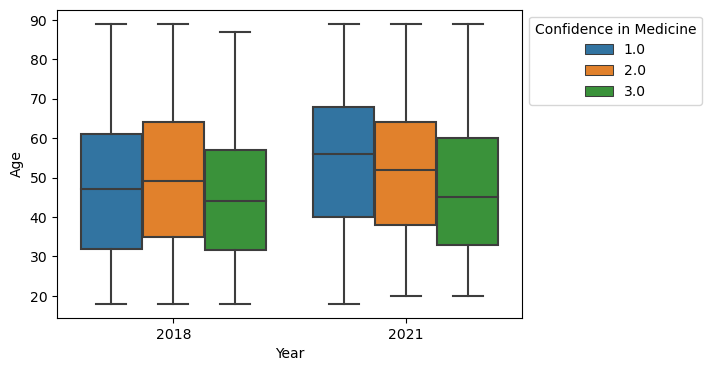

In [91]:
fig = plt.figure(figsize=(6, 4))
sns.boxplot(data = df, x='year', y='age', hue='conmedic')
plt.legend(loc='upper left', title="Confidence in Medicine", bbox_to_anchor=(1, 1))
plt.xlabel("Year")
plt.ylabel("Age")

##### Supplemental Plots

For further context, we show the distribution of age for our subjects in pre and post-pandemic surveys.

<AxesSubplot:xlabel='age', ylabel='Count'>

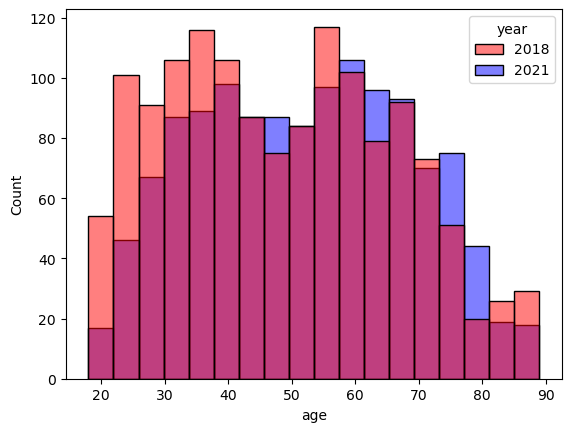

In [110]:
sns.histplot(data = df, x='age', hue='year', palette=['red', 'blue'])